# Linear Regression

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Regression/data/linear_regression_dataset.csv", sep=";")

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


sep=";" kodunu yazarak deneyim;maas yazarken aradaki ; işaretini kaldırdık. Yoksa AttributeError hatası alıyoruz.
Normalde , ile ayrıldıgı için default olarak sep="," var.

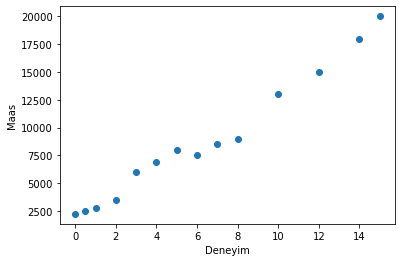

In [5]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim")
plt.ylabel("Maas")
plt.show()

- bir line fit edip bunu tahminler için kullanmaya line fit ya da <strong> linear regression</strong> denir.
- x deneyim y ise maas
- eger deneyimden maası elde etmek(predict/tahmin) istiyorsak aşağıdaki formünlü kullanabiliriz:

- <strong>y=b0+b1*x</strong> line'ı bu formüle göre fit ediyoruz.
- <strong>b0</strong> constant(bias)
- <strong>b1</strong> coeff (egim)


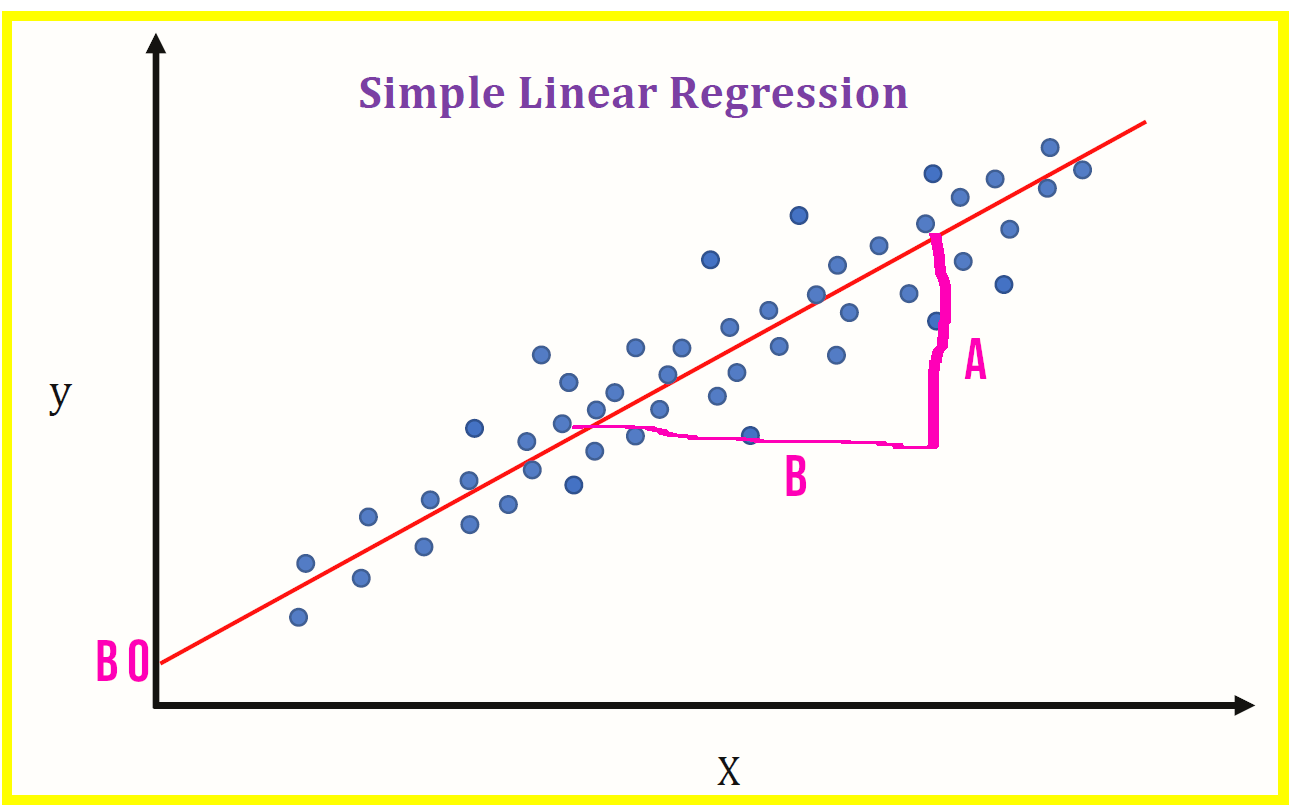

In [57]:
from IPython.display import Image
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Regression/LinearRegression/image/1_aFLKx4NWeAs955loIBfr8w.png') 

coeff yani <strong>egim = a/b</strong> ile bulunur.

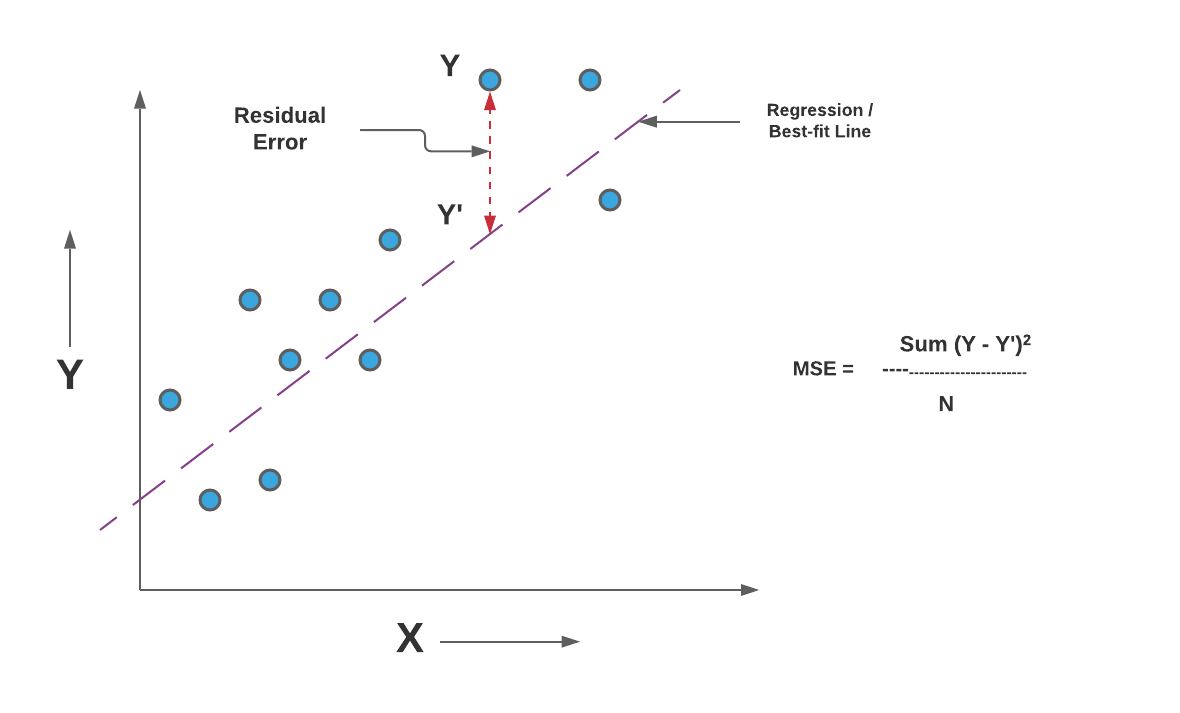

In [54]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Regression/Regression-terminologies-Page-2.png') 

- residual error = y - y' ya da y - y_pred (gercek - tahmin)
- çizginin yukarısındaki error'u hesaplamak istersek + aşağısındaki bir noktadan error'u hesaplamak istersek - bir değer buluruz. bu yüzden karesini alıyoruz:
- (residual)^2
- genel error'u bulmak için tüm residual errorleri bulmam lazım yani hepsini toplarım
- sum((residual)^2) bu topladıgımı n'e yani sample sayısına bölersek bir nevi scaling oluyor:
- sum((residual)^2) / n buna da <strong>MSE(Mean Squared Error)</strong> denir.

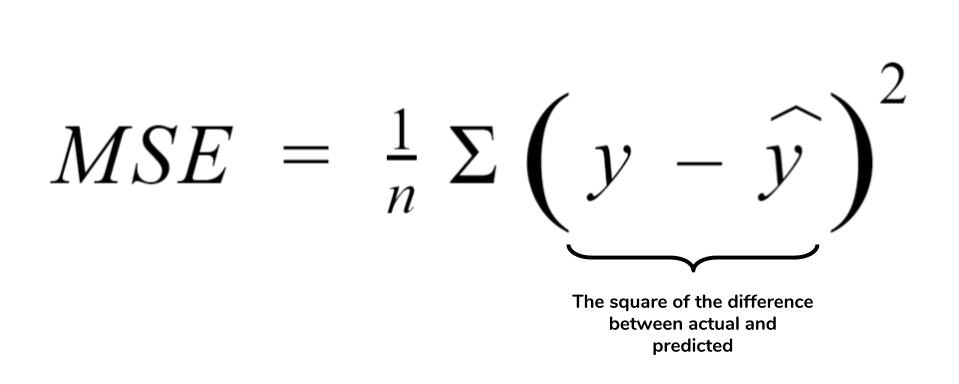

In [58]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Regression/LinearRegression/image/Differences-between-MSE-and-RMSE-1-i2tutorials.jpeg') 

amacımız minimum MSE bulmak fakat y=b0+b1*x en uygun b0 ve b1 değerleri benim zaten MSE'min düşük olmasını sağlıyor.

In [6]:
from sklearn.linear_model import LinearRegression
linear_reg= LinearRegression() #modelimi bir variable'a eşitledik
x=df.deneyim
y=df.maas

In [7]:
type(df.deneyim) 

pandas.core.series.Series

- bunu numpy'a çevirmek istiyoruz
- aslında pandas.series de kullanabiliriz fakat kullanacağımız şeyler açısından numpy olması daha iyi.

In [8]:
df.deneyim.values

array([ 0.5,  0. ,  1. ,  5. ,  8. ,  4. , 15. ,  7. ,  3. ,  2. , 12. ,
       10. , 14. ,  6. ])

şuan <strong> .values </strong> kullanarak numpy array'e çevirdim.

In [9]:
(df.deneyim.values).shape

(14,)

şuan 14,1'lik bir arrayim var fakat şuan boşluk olarak durmasını sklearn 1 olarak algılamaz onu düzeltmek için :

In [10]:
(df.deneyim.values.reshape(-1,1)).shape

(14, 1)

<strong>.reshape(-1,1)</strong> ile o boşluğu 14,1 yaptık.

yani artık x ve y'i yazabiliriz.

In [11]:
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [12]:
linear_reg.fit(x,y) #modelimi fit ettim, model olusturdum
#burada optimum b0 ve b1 degerleri hesaplanır. 

LinearRegression()

In [13]:
b0 = linear_reg.predict([[0]]) 

- y=b0+b1*x <br>
- x=0 iken ki değeri line'ın y eksenini kestiği nokta b0 noktasıdır.
- yani x'e sıfır verirsem b0'ı elde ederim.

In [14]:
print("b0:",b0)

b0: [[1663.89519747]]


b0'ı bulmanın başka bir yolu ise:

In [15]:
b0_=linear_reg.intercept_ #y eksenini kestiği nokta yani (intercept noktası)

In [16]:
print("b0_:",b0_)

b0_: [1663.89519747]


b1 bulmak için ise:

In [17]:
b1=linear_reg.coef_ #coef yani eğim (slope)

In [18]:
print("b1:",b1)

b1: [[1138.34819698]]


maas = 1663 + 1138 * deneyim  artık b0 ve b1'i bulduguma göre istediğim değeri tahmin edebilirim.

In [19]:
maas = 1663 + 1138 * 11

In [20]:
print("11 yıllık deneyim=", maas)

11 yıllık deneyim= 14181


bu yukarıdaki yaptıgımı direkt olarak <strong>predict</strong>'i kullanarak tahmin edebilirim..

In [21]:
linear_reg.predict([[11]]) #11 yıllık deneyimi predict ettim.. 
#fit ile elde ettiğimiz b0 ve b1 değerlerine x burada eklenir ve tahmin yapmış oluruz.

array([[14185.72536421]])

In [22]:
import numpy as np

In [39]:
array=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) #bunları predict edeceğim bunlar benim deneyimim

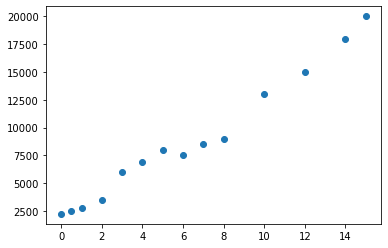

In [40]:
plt.scatter(x,y) #bunlar benim verisetimdeki x ve y değerleri
plt.show()

In [31]:
array.shape #sklearn için bunu 16,1 yapmamız gerekiyordu

(16,)

In [32]:
array=array.reshape(-1,1)

In [33]:
array.shape

(16, 1)

In [34]:
y_pred = linear_reg.predict(array) #burası da predict ettiğim maaşım olacak line'ı burada çizdirdim
#bu çizgi benim verisetindeki değerlerime göre tahminlerin olmasını beklediğim yer.

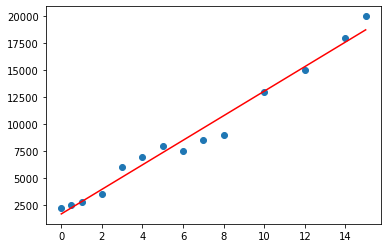

In [38]:
plt.plot(array, y_pred, color="red") #line'ı çizdirdim 
plt.scatter(x,y) #noktaları çizdirdim.
plt.show()

- plt.plot(array, y_pred, color="red") 
- burada array benim x'im yani deneyimim buna bağlı olarak bir y değeri görselleştirmek istiyorum yani maası tahmin etmek,
- bu da y_pred oluyor,
- y_pred benim tahminim, modeli eğitince(fit) olmasını beklediğim değerler,
- y_pred line'ı temsil ediyor 
- noktalarsa gerçek verilerim 
- bir noktayı alıp line ile birleştirirsem bu benim loss'umdur,
- çünkü gerçek veri - y_pred(tahmin) loss'u verir.

In [46]:
x[4]   #x degeri

array([8.])

In [47]:
y[4] #x karşısındaki y değeri (gerçek)

array([9000])

In [49]:
linear_reg.predict([[8]]) #olmasını beklediğim değer, kırmızı çizgi üzerindeki değer (tahmin)

array([[10770.68077328]])